In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
video=cv2.VideoCapture('1_hertz (Converted).mov')
ret,frame=video.read()

count=0
while count<100 and ret:
    count+=1
    ret,frame=video.read()
    
cv2.imwrite('sample.png',frame)

True

In [2]:
image=cv2.imread('sample.png',cv2.IMREAD_COLOR)

In [3]:
def imshow(img):
    if len(img.shape)==3:
        image2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        plt.imshow(image2)
        plt.show()
    elif len(img.shape)==2:
        plt.imshow(img,cmap='gray',interpolation='bicubic')

In [4]:
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

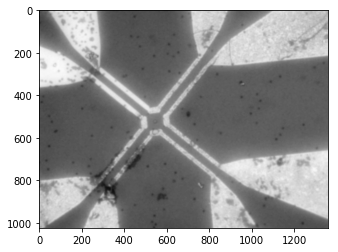

In [5]:
imshow(gray)

In [6]:
template=cv2.imread('template1.png',0)

In [7]:
w,h=template.shape[::-1]

In [8]:
res=cv2.matchTemplate(gray,template,cv2.TM_CCOEFF_NORMED)

In [9]:
threshold=0.8

In [134]:
cv2.imwrite('scores.png',255*((res>threshold).astype(np.float32)))

True

In [10]:
loc=[np.where(res>=threshold)[0],np.where(res>=threshold)[1],res[np.where(res>=threshold)]]

In [11]:
len(loc[0])

573

In [12]:
def nms(data,th=0.1,w=13):
    xs=data[0]
    ys=data[1]
    scores=data[2]
    indices=np.argsort(scores)[::-1]
    idxs=indices[:]
    picked=[]
    while(len(indices)>0):
        picked.append(indices[0])
        indices=indices[1:][~np.bitwise_and(np.abs(xs[indices[0]]-xs[indices[1:]])<w,np.abs(ys[indices[0]]-ys[indices[1:]])<w)]
    return [xs[picked],ys[picked]]

In [13]:
loc=nms(loc)

In [14]:
len(loc[0])

136

In [53]:
?list.pop

In [30]:
cv2.imwrite('scores.png',loc[1])

True

In [26]:
np.max(loc[1])

0.99418771

In [15]:
for pt in zip(*loc[::-1]):
    center=(pt[0]+6,pt[1]+6)
    cv2.circle(image,center,(w+1)//2,(0,255,0),1)

In [200]:
for pt in zip(*loc[::-1]):
    #print(pt)
    cv2.rectangle(image,pt,(pt[0]+w,pt[1]+h),(0,255,0),1,cv2.LINE_AA)

In [16]:
cv2.imwrite('identified.png',image)

True

In [64]:
res.shape

(1538, 2085)

In [101]:
all_points=zip(*loc[::-1])
M=len(all_points)
distances=np.zeros((M,M),dtype=np.float64)
def dist(pt1,pt2):
    return np.sqrt((pt1[0]-pt2[0])**2+(pt1[1]-pt2[1])**2)
for i in xrange(M):
    for j in xrange(M):
        distances[i,j]= dist(all_points[i],all_points[j])
#there are overlapping windows in the detection. What we really need is non-maximum suppression

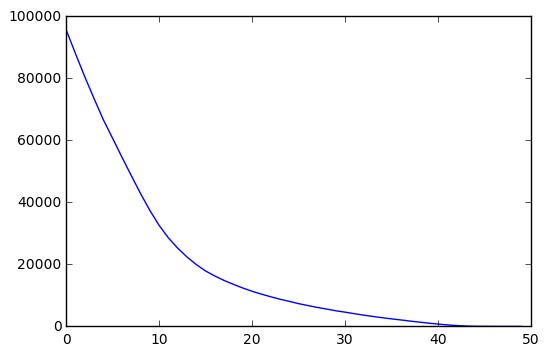

In [85]:
sums=[]
for th in xrange(50,100):
    sums.append(np.sum(res>=th/100.0))
    
plt.plot(np.array(sums))

In [87]:
bead_diameter=40
def find_overlap(pt1,pt2):
    if dist(pt1,pt2)>bead_diameter:
        return 0
    else:
        pt1x=np.arange(pt1[0],pt1[0]+w)
        pt1y=np.arange(pt1[1],pt1[1]+w)
        rect1=set(zip(pt1x,pt1y))
        pt2x=np.arange(pt2[0],pt2[0]+w)
        pt2y=np.arange(pt2[1],pt2[1]+w)
        rect2=set(zip(pt2x,pt2y))
        overlap=float(len(rect1.intersection(rect2)))/(w*h)
        return overlap

In [103]:
overlaps=np.zeros((M,M),dtype=np.float64)
for i in xrange(M):
    for j in xrange(M):
        overlaps[i,j]=find_overlap(all_points[i],all_points[j])
        
plt.surf(overlaps)

AttributeError: 'module' object has no attribute 'surf'

In [108]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
def surf(Z):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    N,M=Z.shape[::-1]
    x=np.arange(N)
    y=np.arange(M)
    X,Y=np.meshgrid(x,y)
    ax.plot_surface(X,Y,Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

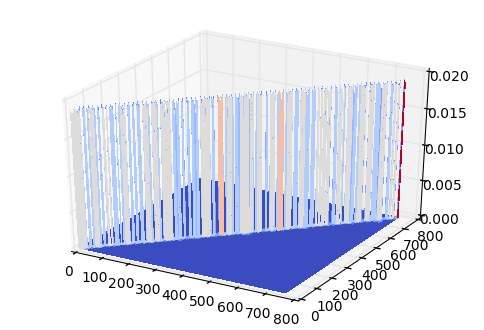

In [109]:
surf(overlaps)